<a href="https://colab.research.google.com/github/nabilnehme/AAI614_Nehme/blob/main/Week3/AAI614_Nabil_Nehme_Notebook3.2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AAI614: Data Science & its Applications



In [20]:
import pandas as pd
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

Exercise I. Load the following datafile from GitHub

In [21]:
grads = pd.read_csv("https://raw.githubusercontent.com/harmanani/AAI614/main/Week%203/grads.csv")

In [22]:
grads

,Student Name,Avg Hours Studies per Week,GPA,University,Sense of Humour (0-5),Salary
0,George,20,NaN,NYU,3.0,$40k
1,Jerry,35,3.5,Columbia,5.0,$80k
2,Elaine,55,4.0,Columbia,4.2,$60k
3,Cosmo,5,2.0,City College,2.0,$25k
4,Newman,25,2.8,City College,0.0,$50k
5,Frank,35,3.0,Festivus Uni,NaN,$40k
6,Estelle,100,3.2,Festivus Uni,1.7,$0k
7,Leo,15,2.4,Festivus Uni,0.0,$35k
8,Rachel,50,4.0,Columbia,NaN,$75k


Question 1: Identify all the outliers in the above data.  Justify your answers using objective measures.

Outliers for Each Column:

Column: Avg Hours Studies per Week
Outlier Values:
6    100
Name: Avg Hours Studies per Week, dtype: int64

Rows Containing Outliers:
  Student Name  Avg Hours Studies per Week  GPA     University  \
6      Estelle                         100  3.2  Festivus Uni    

   Sense of Humour (0-5)  Salary  
6                    1.7     0.0  

Column: GPA
No outliers found in this column.

Column: Sense of Humour (0-5)
No outliers found in this column.

Column: Salary
No outliers found in this column.


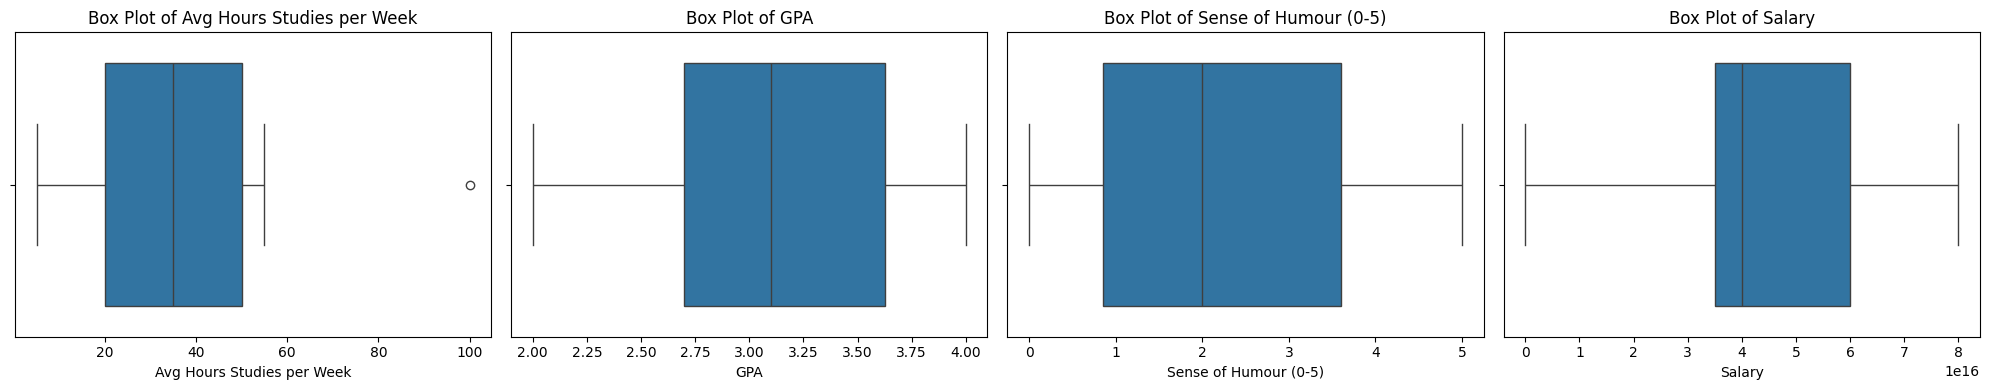

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'Salary' is a string before cleaning
grads['Salary'] = grads['Salary'].astype(str)  # Convert to string
grads['Salary'] = grads['Salary'].str.replace('[^\d.]', '', regex=True).astype(float) * 1000

# Define a function to identify outliers using IQR
def find_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (series < lower_bound) | (series > upper_bound)  # Return a boolean mask

# Include 'Salary' in numerical columns
numerical_columns = grads.select_dtypes(include=["float64", "int64"]).columns

print("Outliers for Each Column:")

# Analyze outliers for numerical columns and print entire rows
for column in numerical_columns:
    print(f"\nColumn: {column}")
    outlier_mask = find_outliers_iqr(grads[column])  # Get boolean mask for outliers
    outlier_values = grads.loc[outlier_mask, column]  # Outlier values
    outlier_rows = grads[outlier_mask]  # Entire rows with outliers

    if not outlier_values.empty:
        print(f"Outlier Values:\n{outlier_values}")
        print("\nRows Containing Outliers:")
        print(outlier_rows)
    else:
        print("No outliers found in this column.")

# Plot box plots for numerical columns in a single row
plt.figure(figsize=(20, 4))  # Adjust figure width for better visualization
for i, column in enumerate(numerical_columns):
    plt.subplot(1, len(numerical_columns), i + 1)  # Single row, multiple columns
    sns.boxplot(data=grads, x=column)
    plt.title(f"Box Plot of {column}")
    plt.xlabel(column)
plt.tight_layout()
plt.show()


**Based on the Box Plots we can see that Estelle having 100 as "Avg Hours Studies per Week" is an Outlier**

Question 2: There are various data that are missing.  Fill-in the missing data or delete the rows/columns that you think you should delete.  Justify your answer

In [32]:
grads

,Student Name,Avg Hours Studies per Week,GPA,University,Sense of Humour (0-5),Salary
0,George,20,NaN,NYU,3.0,4.000000e+16
1,Jerry,35,3.5,Columbia,5.0,8.000000e+16
2,Elaine,55,4.0,Columbia,4.2,6.000000e+16
3,Cosmo,5,2.0,City College,2.0,2.500000e+16
4,Newman,25,2.8,City College,0.0,5.000000e+16
5,Frank,35,3.0,Festivus Uni,NaN,4.000000e+16
6,Estelle,100,3.2,Festivus Uni,1.7,0.000000e+00
7,Leo,15,2.4,Festivus Uni,0.0,3.500000e+16
8,Rachel,50,4.0,Columbia,NaN,7.500000e+16


 **Based on the dataframe, we can see that GPA and Sense of Humour (0-5) have missing data.
The missing GPA can be filled with the mean and the missing Sense of humour can be filled with the median.
In my opinion we can delete rows missing the student name or university which is not the case, so no need to remove any row/column from the dataframe.**

In [36]:
# Check missing data
print("Missing Data Summary:")
print(grads.isnull().sum())

# 1. Fill missing data in numerical columns
grads['GPA'].fillna(grads['GPA'].mean(), inplace=True)  # Fill missing GPA with mean
grads['Sense of Humour (0-5)'].fillna(grads['Sense of Humour (0-5)'].median(), inplace=True)  # Fill with median

# 2. Drop rows where 'University' or 'Student Name' is missing (if applicable)
# Assuming all student names and university names are critical identifiers
grads.dropna(subset=['University', 'Student Name'], inplace=True)

# 3. Inspect and decide about other columns
# If 'Salary' has missing values, drop such rows (salary is important for analysis)
grads.dropna(subset=['Salary'], inplace=True)

# Check the resulting dataset
print("\nDataset after handling missing data:")
grads


Missing Data Summary:
Student Name                  0
Avg Hours Studies per Week    0
GPA                           0
University                    0
Sense of Humour (0-5)         0
Salary                        0
dtype: int64

Dataset after handling missing data:


<ipython-input-36-02b392d87325>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  grads['GPA'].fillna(grads['GPA'].mean(), inplace=True)  # Fill missing GPA with mean
<ipython-input-36-02b392d87325>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].me

,Student Name,Avg Hours Studies per Week,GPA,University,Sense of Humour (0-5),Salary
0,George,20,3.1125,NYU,3.0,4.000000e+16
1,Jerry,35,3.5000,Columbia,5.0,8.000000e+16
2,Elaine,55,4.0000,Columbia,4.2,6.000000e+16
3,Cosmo,5,2.0000,City College,2.0,2.500000e+16
4,Newman,25,2.8000,City College,0.0,5.000000e+16
5,Frank,35,3.0000,Festivus Uni,2.0,4.000000e+16
6,Estelle,100,3.2000,Festivus Uni,1.7,0.000000e+00
7,Leo,15,2.4000,Festivus Uni,0.0,3.500000e+16
8,Rachel,50,4.0000,Columbia,2.0,7.500000e+16


Question 3: Reload the data and fill-in the data using mean method as well as the frequent method.

In [37]:
import pandas as pd
import numpy as np

# Reload the data
grads = pd.read_csv("https://raw.githubusercontent.com/harmanani/AAI614/main/Week%203/grads.csv")

# Ensure 'Salary' is cleaned
grads['Salary'] = grads['Salary'].astype(str)
grads['Salary'] = grads['Salary'].str.replace('[^\d.]', '', regex=True).astype(float) * 1000

# Method 1: Fill missing values using the mean (for numerical columns)
grads_mean_filled = grads.copy()
for column in grads_mean_filled.select_dtypes(include=["float64", "int64"]).columns:
    grads_mean_filled[column].fillna(grads_mean_filled[column].mean(), inplace=True)

# Method 2: Fill missing values using the most frequent value (for categorical columns)
grads_frequent_filled = grads.copy()
for column in grads_frequent_filled.columns:
    if grads_frequent_filled[column].dtype == "object":
        grads_frequent_filled[column].fillna(grads_frequent_filled[column].mode()[0], inplace=True)

# Display results
print("Data after filling missing values using mean method (numerical columns):")
print(grads_mean_filled)

print("\nData after filling missing values using frequent method (categorical columns):")
print(grads_frequent_filled)


Data after filling missing values using mean method (numerical columns):
  Student Name  Avg Hours Studies per Week     GPA     University  \
0       George                          20  3.1125            NYU   
1        Jerry                          35  3.5000       Columbia   
2       Elaine                          55  4.0000       Columbia   
3        Cosmo                           5  2.0000   City College   
4       Newman                          25  2.8000   City College   
5        Frank                          35  3.0000   Festivus Uni   
6      Estelle                         100  3.2000  Festivus Uni    
7          Leo                          15  2.4000   Festivus Uni   
8       Rachel                          50  4.0000       Columbia   

   Sense of Humour (0-5)   Salary  
0               3.000000  40000.0  
1               5.000000  80000.0  
2               4.200000  60000.0  
3               2.000000  25000.0  
4               0.000000  50000.0  
5               2.27

<ipython-input-37-741cd77be7cd>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  grads_mean_filled[column].fillna(grads_mean_filled[column].mean(), inplace=True)
<ipython-input-37-741cd77be7cd>:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].meth

Exercise II. Run the cell below to create a new dataframe called `df_miss`.  Its first column will contain some missing values.

In [38]:
import pandas as pd
import numpy as np
import random

nrows = 10
ncols = 5

# set a seed for random number generation
np.random.seed(314)
# create an array filled with random data
data = np.array(np.random.rand(nrows, ncols))
# put the data to a pandas dataframe
df_miss = pd.DataFrame(data)
# rename the columns
df_miss.columns = ['col_'+str(ii) for ii in range(ncols)]

# randomly set some values to missing
ix0 = np.random.randint(nrows, size=3)
ix1 = np.random.randint(nrows, size=3)

df_miss['col_0'][ix0] = np.nan
df_miss['col_1'][ix1] = np.nan

print(df_miss)

      col_0     col_1     col_2     col_3     col_4
0       NaN       NaN  0.265048  0.783205  0.918001
1  0.827355       NaN  0.260480  0.911763  0.260757
2  0.766376  0.261531  0.122291  0.386006  0.840081
3       NaN       NaN  0.633110  0.584766  0.581232
4  0.677205  0.687155  0.438927  0.320927  0.570552
5       NaN  0.861074  0.834805  0.105766  0.060408
6  0.596882  0.792395  0.226356  0.535201  0.136066
7  0.372244  0.151977  0.429822  0.792706  0.406957
8  0.177850  0.909252  0.545331  0.100497  0.718721
9  0.978429  0.309776  0.260126  0.662900  0.139720


<ipython-input-38-a77e6ba6a8cb>:21: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_miss['col_0'][ix0] = np.nan
<ipython-input-38-a77e6ba6a8cb>:22: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting 

Impute the missing values (NaN) in `col_0` (but not `col_1`) with the median.  Store the values in the dataframe by using the parameter `inplace`.  Print the dataframe.

In [39]:
# Calculate the median of col_0
median_col_0 = df_miss['col_0'].median()

# Impute missing values in col_0 with the median
df_miss['col_0'].fillna(median_col_0, inplace=True)

# Print the updated DataFrame
print(df_miss)


      col_0     col_1     col_2     col_3     col_4
0  0.677205       NaN  0.265048  0.783205  0.918001
1  0.827355       NaN  0.260480  0.911763  0.260757
2  0.766376  0.261531  0.122291  0.386006  0.840081
3  0.677205       NaN  0.633110  0.584766  0.581232
4  0.677205  0.687155  0.438927  0.320927  0.570552
5  0.677205  0.861074  0.834805  0.105766  0.060408
6  0.596882  0.792395  0.226356  0.535201  0.136066
7  0.372244  0.151977  0.429822  0.792706  0.406957
8  0.177850  0.909252  0.545331  0.100497  0.718721
9  0.978429  0.309776  0.260126  0.662900  0.139720


<ipython-input-39-adc754fd1729>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_miss['col_0'].fillna(median_col_0, inplace=True)


Impute the missing values in `col_1` with value 0.  Store the values in the dataframe by using the parameter `inplace`.  Print the dataframe.

In [40]:
# Impute missing values in col_1 with 0
df_miss['col_1'].fillna(0, inplace=True)

# Print the updated DataFrame
print(df_miss)


      col_0     col_1     col_2     col_3     col_4
0  0.677205  0.000000  0.265048  0.783205  0.918001
1  0.827355  0.000000  0.260480  0.911763  0.260757
2  0.766376  0.261531  0.122291  0.386006  0.840081
3  0.677205  0.000000  0.633110  0.584766  0.581232
4  0.677205  0.687155  0.438927  0.320927  0.570552
5  0.677205  0.861074  0.834805  0.105766  0.060408
6  0.596882  0.792395  0.226356  0.535201  0.136066
7  0.372244  0.151977  0.429822  0.792706  0.406957
8  0.177850  0.909252  0.545331  0.100497  0.718721
9  0.978429  0.309776  0.260126  0.662900  0.139720


<ipython-input-40-d45dcd05f156>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_miss['col_1'].fillna(0, inplace=True)
